# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [138]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []
ratings= []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    rev_rat=parsed_content.find_all("div",{"class":"rating-10"})
    print("rev_rat",len(rev_rat))
    for i in range(1,page_size+1):
        rating=rev_rat[i].find("span",{"itemprop":"ratingValue"})
        if rating!=None:
            ratings.append(int(rating.get_text().strip()))
        else: ratings.append(np.nan)

        
    
    print(f"   ---> {len(reviews)} total reviews, {len(ratings)} total ratings")

Scraping page 1
rev_rat 101
   ---> 100 total reviews, 100 total ratings
Scraping page 2
rev_rat 101
   ---> 200 total reviews, 200 total ratings
Scraping page 3
rev_rat 101
   ---> 300 total reviews, 300 total ratings
Scraping page 4
rev_rat 101
   ---> 400 total reviews, 400 total ratings
Scraping page 5
rev_rat 101
   ---> 500 total reviews, 500 total ratings
Scraping page 6
rev_rat 101
   ---> 600 total reviews, 600 total ratings
Scraping page 7
rev_rat 101
   ---> 700 total reviews, 700 total ratings
Scraping page 8
rev_rat 101
   ---> 800 total reviews, 800 total ratings
Scraping page 9
rev_rat 101
   ---> 900 total reviews, 900 total ratings
Scraping page 10
rev_rat 101
   ---> 1000 total reviews, 1000 total ratings
Scraping page 11
rev_rat 101
   ---> 1100 total reviews, 1100 total ratings
Scraping page 12
rev_rat 101
   ---> 1200 total reviews, 1200 total ratings
Scraping page 13
rev_rat 101
   ---> 1300 total reviews, 1300 total ratings
Scraping page 14
rev_rat 101
   ---> 14

In [140]:
len(reviews)
len(ratings)

3600

In [145]:
df = pd.DataFrame()
df["reviews"] = reviews
df["ratings"] = ratings

df.iloc[100]

reviews    ✅ Trip Verified |. The BA first lounge at Term...
ratings                                                  2.0
Name: 100, dtype: object

In [2]:
df.to_csv("data/BA_reviews.csv")
df.head()

NameError: name 'df' is not defined

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [109]:
!pip install nltk

In [8]:
df=pd.read_csv("data/BA_reviews.csv")
df.index=range(df.shape[0])
df.index
#drop duplicates
df.drop_duplicates(inplace=True)

# handling missing values:
df.isna().sum() 

Unnamed: 0    0
reviews       0
ratings       5
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum() 
df.index=range(df.shape[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595 entries, 0 to 3594
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3595 non-null   int64  
 1   reviews     3595 non-null   object 
 2   ratings     3595 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 84.4+ KB


##### So, we have no missing values

In [15]:
import numpy as np

#How many verified trip we have ?
np.array(["Trip Verified" in df["reviews"][i] for i in range(df.shape[0])]).sum()
#df.head()

1118

#### 1118 trips are verified.

In [17]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import wordcloud as wc

In [31]:
import re

# List of HTML tags
html_tags = [
     "abbr", "acronym", "article", "aside", "audio", "b",
    "bdi", "bdo", "blockquote", "br", "button", "canvas", "caption",
    "col", "colgroup", "command", "datalist", "dd", "del", "dfn",
    "dialog", "div", "dl", "dt", "em", "embed", "fieldset", "figcaption",
    "footer", "form","header", "h1", "h2", "h3", "h4", "h5", "h6", "hr",
    "html", "i", "img", "input", "ins", "kbd", "label", "legend", "li", "link",
    "main", "map", "mark","meta", "meter", "nav", "noscript",
    "ol", "optgroup", "output", "p", "param", "pre", "progress", "q",
    "quote", "rp", "rt", "ruby", "s", "samp", "script",
    "span", "sub", "summary", "sup", "tbody", "td",
    "textarea", "tfoot", "th", "thead","tr", "u", "ul",
    "var", "wbr","http","https","www","com"
]

# List of punctuation
punctuation = [
    ".", "?", "!", ",", ";", ":", "\"", "'", "(", ")", "[", "]", "{", "}", "-", "/","✅",
    "+", "*", "&", "|", "~", "=", "_", "°", "%", "$", "#", "@", "^", "*", "µ", "µm","\\",
    
]

# List of stop words
stop_words = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
    "any", "are", "as", "at", "be", "because", "been", "before", "being", "below",
    "between", "by", "can", "cannot", "could", "did", "do", "does", "doing", "down",
    "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
    "he", "her", "here", "hers", "him", "himself", "his", "how", "i", "if", "in",
    "into", "is", "it", "its", "itself", "let", "like", "likely", "may", "me", "might",
    "most", "must", "my", "myself", "no", "nor", "not", "of", "off", "on", "once",
    "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own",
    "same", "she", "should", "so", "some", "such", "than", "that", "the", "their",
    "them", "themselves", "then", "there", "these", "they", "this", "those", "through",
    "to", "toward", "under", "until", "up", "upon", "us", "very", "was", "we",
    "were", "what", "when", "where", "which", "while", "who", "whom", "why", "with",
    "would", "you", "your", "yours", "yourself", "yourselves","flight","British","Airway",
    "BA","but","seat","seats","Airways","one","airline"
]

# Combine the lists
remove_list = stop_words +html_tags + punctuation
#pd.DataFrame({"char+words_to_remove":remove_list}).to_csv("char+words_to_remove.csv")

In [18]:
nltk_stop_words=stopwords.words("english")
nltk_stop_words.extend(["flight","british","Airway","not","verified","trip"
    "BA","but","seat","seats","Airways","one","airline"])
nltk_stop_words.remove("not")
nltk_stop_words.remove("no")

nltk_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
"---------------------------------Data cleaning and pipline------------------------------------- "

#removing liks|urls:
def links_remover(content):
    content=re.sub(r'http\S+','',content)
    return re.sub(r'https\S+','',content)
    
#removing speciale caracters from text :

def special_char_remover(content):
    return  re.sub('\[[(^&@#%"`{}/|+-_£!)]]*\'','', content)

#remove the stopwords from the text:
def stopwords_remover(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in nltk_stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

#Expansion of english contractions
def contraction_expansion(content):
    content=re.sub(r"won\'t","would not",content)
    content=re.sub(r"can\'t","can not",content)
    content=re.sub(r"don\'t","do not",content)
    content=re.sub(r"shouldn\'t","should not",content)
    content=re.sub(r"needn\'t","need not",content)
    content=re.sub(r"hasn\'t","has not",content)
    content=re.sub(r"weren\'t","were not",content)
    content=re.sub(r"didn\'t","did not",content)
    content=re.sub(r"n\'t","not",content)
    content=re.sub(r"\'re","are",content)
    content=re.sub(r"\'s","is",content)
    content=re.sub(r"\'ll","will",content)
    content=re.sub(r"\'t","not",content)
    content=re.sub(r"\'ve","have",content)
    content=re.sub(r"\'m","am",content)
    return content

#data preprocessing
def data_cleaner(content):
    content=links_remover(content)
    content=special_char_remover(content)
    content=stopwords_remover(content)
    content=contraction_expansion(content)
    return content

    


In [24]:
original_review=df["reviews"]

In [25]:
%%time
df["clean_review"]=df["reviews"].apply(data_cleaner)

CPU times: total: 1.64 s
Wall time: 1.64 s


In [26]:
df.head()

,Unnamed: 0,reviews,ratings,clean_review
0,0,Not Verified | British Airways has confirmed ...,1.0,airways confirmed worst last minute no refusal...
1,1,✅ Trip Verified | Worst BA experience. I was s...,2.0,trip worst ba supposed fly italy september arr...
2,2,✅ Trip Verified | My daughter and I were deni...,1.0,trip daughter denied boarding business class m...
3,3,✅ Trip Verified | Despite boarding being the u...,8.0,trip despite boarding usual free lhr groups ca...
4,4,"Not Verified | Flight cancelled, no crew! 9th...",1.0,no september peak holiday period bad managemen...


In [13]:
#df["original_review"]=original_review

In [29]:
df.rename(columns={"reviews":"original_review"},inplace=True)
df=df[["original_review","clean_review","ratings"]]
df.head(10)

,original_review,clean_review,ratings
0,Not Verified | British Airways has confirmed ...,airways confirmed worst last minute no refusal...,1.0
1,✅ Trip Verified | Worst BA experience. I was s...,trip worst ba supposed fly italy september arr...,2.0
2,✅ Trip Verified | My daughter and I were deni...,trip daughter denied boarding business class m...,1.0
3,✅ Trip Verified | Despite boarding being the u...,trip despite boarding usual free lhr groups ca...,8.0
4,"Not Verified | Flight cancelled, no crew! 9th...",no september peak holiday period bad managemen...,1.0
5,"Not Verified | The worst service ever, my bag...",worst service baggage arrive flights never fly...,1.0
6,✅ Trip Verified | 4/4 flights we booked this ...,trip flights booked holiday delayed no wifi av...,1.0
7,✅ Trip Verified | British Airways has a total...,trip airways total lack respect booked fly fra...,1.0
8,"✅ Trip Verified | London Heathrow to Keflavik,...",trip london heathrow iceland business class ai...,8.0
9,✅ Trip Verified | Mumbai to London Heathrow in...,trip mumbai london heathrow business class age...,8.0


            
filtered_reviews=[[filtered_words for word in review if word not in remove_list] for review in reviews_list ]
filtered_reviews

In [34]:
cloud=wc.WordCloud( width=1200,
                   stopwords=nltk_stop_words+html_tags+["no","not","trip","ba","verified"],
                    height=800)
text=" ".join(df["clean_review"].to_list())
generated_text=cloud.generate(text)
reviews_cloud=px.imshow(generated_text,width=800,height=400)


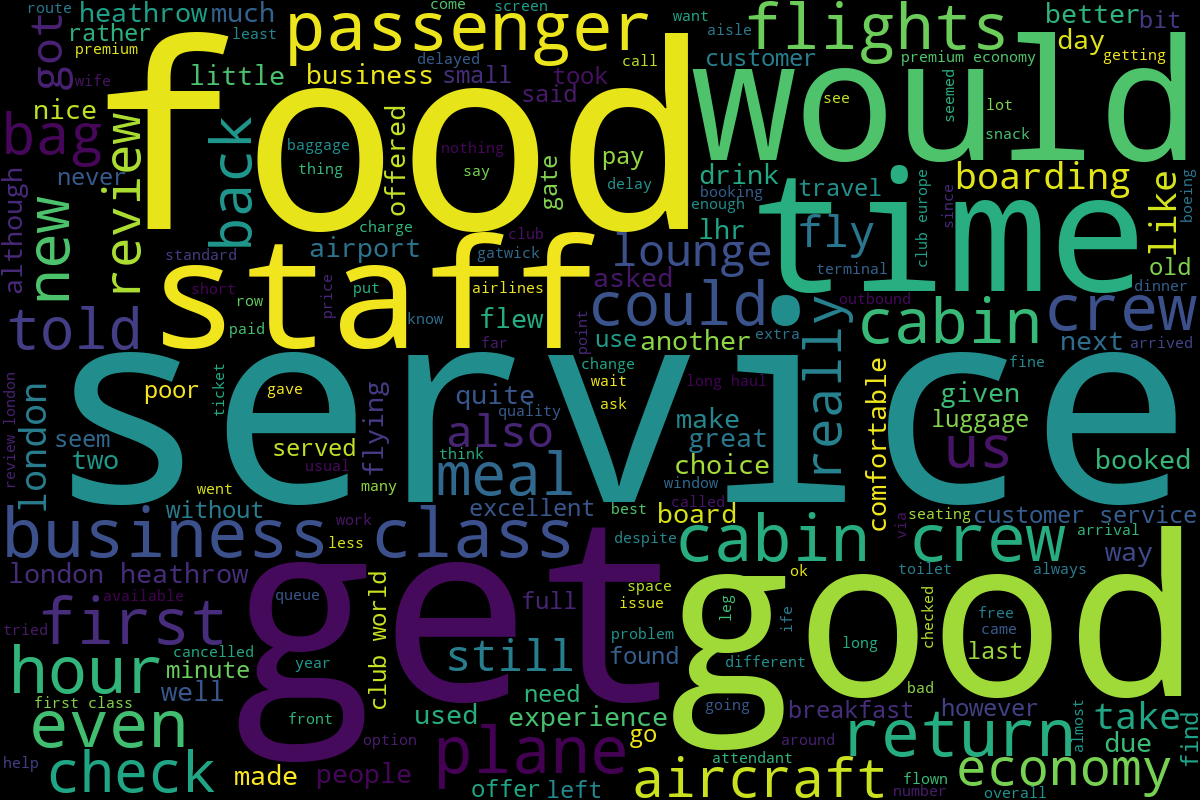

In [35]:
reviews_cloud

In [71]:
import nltk
#nltk.download('punkt')  # Download the NLTK tokenization model (only need to run this once)

from nltk.tokenize import word_tokenize

for review in df["clean_review"]:
    tokens = word_tokenize(review)
    #print(tokens)

#You can use the split() method, which is a built-in function in Python, to split text into tokens based on whitespace or other delimiters. Here's an example:



In [72]:
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    tokenized_text = tokenizer.tokenize(text)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [73]:
df["tokenized_review"]=df["clean_review"].apply(lambda x: text_preprocessing(x))

In [74]:
df

,Unnamed: 0,original_review,clean_review,tokenized_review
0,0,"Not Verified | Flight cancelled, no crew! 9th...",not verified september not peak holiday period...,not verified september not peak holiday period...
1,1,"Not Verified | The worst service ever, my bag...",not verified worst service baggage not arrive ...,not verified worst service baggage not arrive ...
2,2,✅ Trip Verified | 4/4 flights we booked this ...,trip verified flights booked holiday delayed w...,trip verified flights booked holiday delayed w...
3,3,✅ Trip Verified | British Airways has a total...,trip verified british airways total lack respe...,trip verified british airways total lack respe...
4,4,"✅ Trip Verified | London Heathrow to Keflavik,...",trip verified london heathrow iceland business...,trip verified london heathrow iceland business...
...,...,...,...,...
3595,3595,London Heathrow to Madrid on a Boeing 767-300....,london heathrow madrid boeing outward plane co...,london heathrow madrid boeing outward plane co...
3596,3596,Recently for our honeymoon we took advantage o...,recently honeymoon took advantage ba promo fly...,recently honeymoon took advantage ba promo fly...
3597,3597,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,april may boeing started badly went pay final ...,april may boeing started badly went pay final ...
3598,3598,LHR-JTR-LHR. A tale of opposites for BA's new ...,tale opposites new route outward better excell...,tale opposites new route outward better excell...


3600

In [36]:
df['text_len'] = df['clean_review'].astype(str).apply(len)
df['text_word_count'] = df['clean_review'].apply(lambda x: len(str(x).split()))

In [37]:
df.head()

,original_review,clean_review,ratings,text_len,text_word_count
0,Not Verified | British Airways has confirmed ...,airways confirmed worst last minute no refusal...,1.0,94,13
1,✅ Trip Verified | Worst BA experience. I was s...,trip worst ba supposed fly italy september arr...,2.0,742,105
2,✅ Trip Verified | My daughter and I were deni...,trip daughter denied boarding business class m...,1.0,969,139
3,✅ Trip Verified | Despite boarding being the u...,trip despite boarding usual free lhr groups ca...,8.0,307,46
4,"Not Verified | Flight cancelled, no crew! 9th...",no september peak holiday period bad managemen...,1.0,118,18


In [38]:
df.drop_duplicates(subset="clean_review",inplace=True)
df.clean_review.duplicated().sum()

0

In [43]:
inter=[]
for i in df["ratings"]:
    if i<5:
        inter.append("negative")
    elif i==5:
        inter.append("neutral")
    else:
        inter.append("positive")
        
df["rating_interpretation"]=inter   

In [51]:
df=df[["original_review","clean_review","ratings","rating_interpretation","text_len","text_word_count"]]


In [52]:
df.head()

,original_review,clean_review,ratings,rating_interpretation,text_len,text_word_count
0,Not Verified | British Airways has confirmed ...,airways confirmed worst last minute no refusal...,1.0,negative,94,13
1,✅ Trip Verified | Worst BA experience. I was s...,trip worst ba supposed fly italy september arr...,2.0,negative,742,105
2,✅ Trip Verified | My daughter and I were deni...,trip daughter denied boarding business class m...,1.0,negative,969,139
3,✅ Trip Verified | Despite boarding being the u...,trip despite boarding usual free lhr groups ca...,8.0,positive,307,46
4,"Not Verified | Flight cancelled, no crew! 9th...",no september peak holiday period bad managemen...,1.0,negative,118,18


In [53]:
df.to_csv("clean_BA_reviews.csv")

In [54]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

179

In [111]:
np.array([["not","comfortable"] in df["reviews"][i].split() for i in range(df.shape[0])]).sum()


KeyError: 'reviews'

In [ ]:
np.array(["one" in df["reviews"][i].split() for i in range(df.shape[0])]).sum()


In [ ]:
rev_with_one=[]
for  i,review in enumerate(df["reviews"]):
    if "one" in review.split():
        rev_with_one.append(i) 
        #print(i,"--->",review)
len(rev_with_one)      

In [106]:
import ydata_profiling as yp

In [107]:
report=yp.ProfileReport(df,orange_mode=True)
report.to_file("british airlines report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
 "I m the one who will Win this prize".lower()

'i m the one who will win this prize'